In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score, r2_score, f1_score,\
roc_auc_score,mean_absolute_error,mean_absolute_percentage_error,max_error
import shap  # library for explaining model predictions


In [ ]:
# Load the prepared dataset
data_fin_imprt=pd.read_csv("final.csv",  delimiter=',')


In [ ]:
# Split data into features and target, then create train/test split
x=data_fin_imprt.drop('SalePrice',axis=1)
y=data_fin_imprt['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Train the basic random forest model
rfr_mod = RandomForestRegressor(n_estimators=200,max_depth= 8, max_features=9)
rfr_mod.fit(x_train, y_train)
rfr_pred = rfr_mod.predict(x_test)


In [5]:
rfr_mod_sc=rfr_mod.score(x_train,y_train)
print('Random Forest Regression Model Score  : ',round(rfr_mod_sc,3))
r2=r2_score(y_test,rfr_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,rfr_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_rmse=mean_squared_error(y_test,rfr_pred,squared = False)
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, rfr_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(rfr_mod, x, y,scoring='r2' ,cv=5) 
print("Accuracy :",round(scores_cvs.mean()*100,2),"%") # Accuracy of model

Random Forest Regression Model Score  :  0.88
R Sq. Value :  0.86
Adjusted R Sq. Value is :  0.85
Mean Square Error is :  0.025
Root Mean Square Error is :  0.158
Mean Absoulue Error is :  0.111
Accuracy : 82.18 %


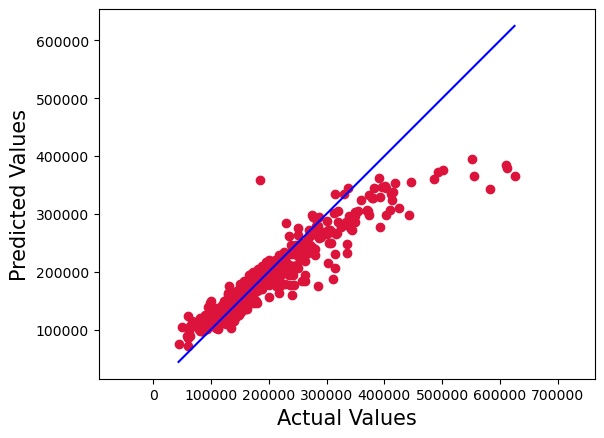

In [ ]:
# Plot actual vs predicted prices (convert from log scale back to dollars)
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(rfr_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


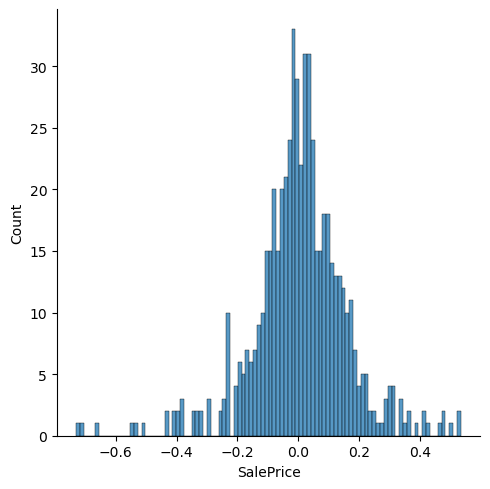

In [ ]:
# Plot distribution of residuals
sb.displot((y_test-rfr_pred),bins=100); 

In [ ]:
# Define hyperparameters for grid search
param_grid = { 
    'n_estimators': [100,300,500],
    'max_depth' : [2,6,10],
    'max_features' : [1,5,9],
}

In [9]:
G_CV_rfc = GridSearchCV(estimator=rfr_mod, param_grid=param_grid, cv= 5) 
# using grid search method to optimise model with hyperparameter tuning

G_CV_rfc.fit(x_train, y_train)# fitting the model
G_CV_rfc.best_params_ # displaying optimised parameters for optimal tuning of model

{'max_depth': 10, 'max_features': 9, 'n_estimators': 500}

{'max_depth': 10, 'max_features': 9, 'n_estimators': 300}

In [ ]:
# Retrain model with optimized hyperparameters
rfr_mod = RandomForestRegressor(n_estimators=300,max_depth= 10, max_features=9)
rfr_mod.fit(x_train, y_train)
rfr_pred = rfr_mod.predict(x_test)

In [11]:
rfr_mod_sc=rfr_mod.score(x_train,y_train)
print('Random Forest Regression Model Score  : ',round(rfr_mod_sc,3))
r2=r2_score(y_test,rfr_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,rfr_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_rmse=mean_squared_error(y_test,rfr_pred,squared = False)
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, rfr_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(rfr_mod, x, y,scoring='r2' ,cv=5) 
print("Accuracy :",round(scores_cvs.mean()*100,2),"%") 
# Accuracy of moadel based on parameter supplied by GridsearchCV

Random Forest Regression Model Score  :  0.924
R Sq. Value :  0.89
Adjusted R Sq. Value is :  0.874
Mean Square Error is :  0.021
Root Mean Square Error is :  0.146
Mean Absoulue Error is :  0.102
Accuracy : 84.35 %


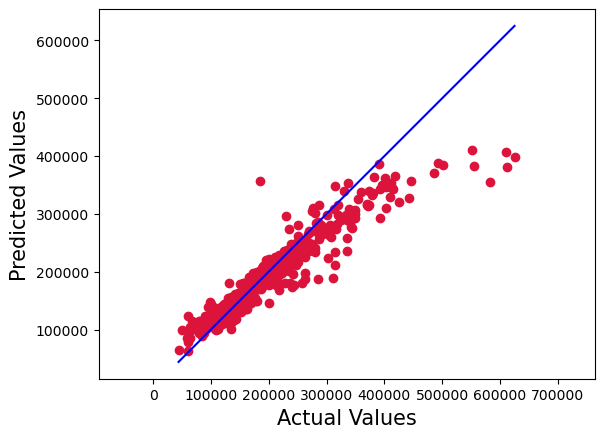

In [ ]:
# Plot actual vs predicted prices (convert from log scale back to dollars)
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(rfr_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


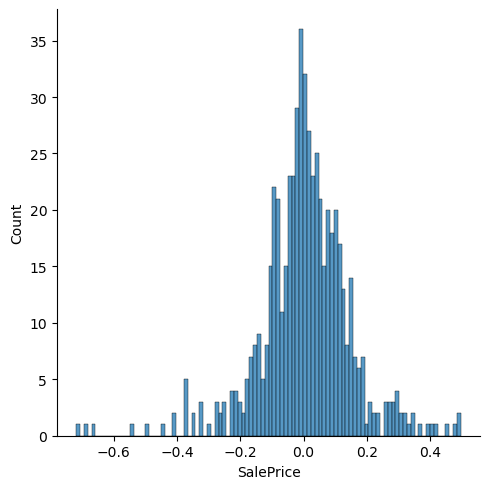

In [ ]:
# Plot distribution of residuals
sb.displot((y_test-rfr_pred),bins=100); 

In [ ]:
# Function to calculate and visualize feature importance using SHAP
def explain_model(model, x_train, x_test):
    explainer = shap.TreeExplainer(model)  # Create explainer for tree models
    shap_values = explainer.shap_values(x_test)  # Calculate SHAP values for each prediction
    shap.summary_plot(shap_values, x_test, plot_type="bar")  # Plot feature importance
    return shap_values  # Return values

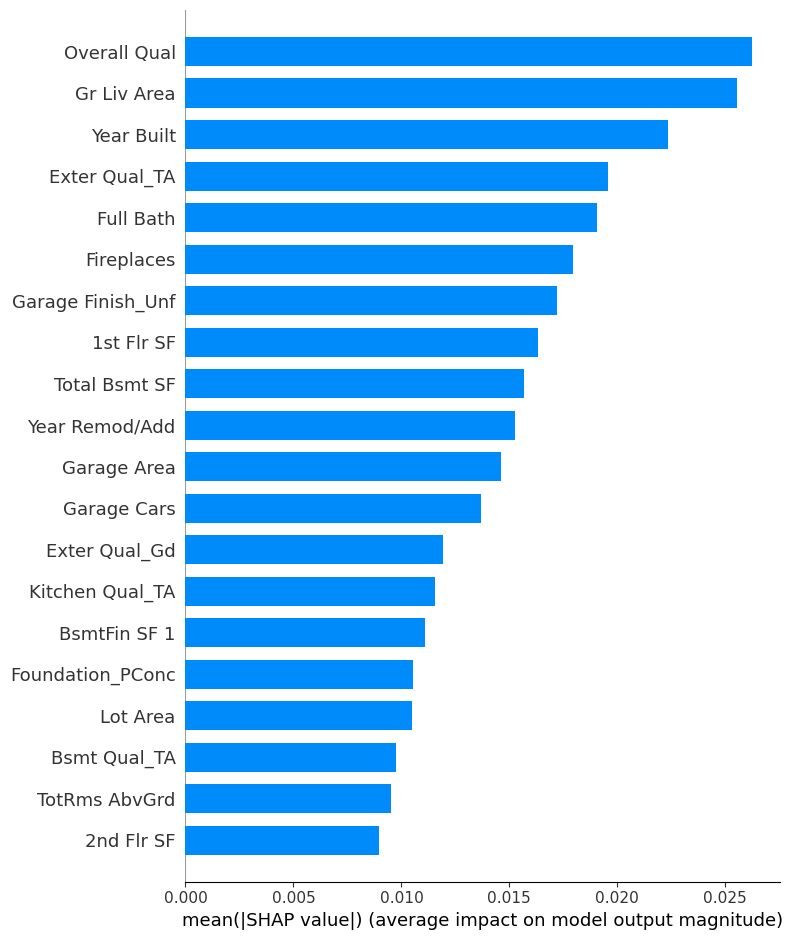

In [ ]:
# Run SHAP analysis on the trained Random Forest model
shap_values = explain_model(rfr_mod, x_train, x_test)